In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [147]:
df = pd.read_csv('2023CarDataset.csv')
#В данной работе датасет представляет собой информацию о автомобилях 2022-2023 года выпуска.
#Car Make - Марка автомобиля
#Car Model - Модель
#Year - Год выпуска
#Body Type - Тип кузова
#Color Options -Цвета доступные к покупке
#Fuel Type - Тип топлива
#Engine Size (L) - Объем двигателя
#Horsepower - Лошадиные силы
#Torque (Nm) - Крутящий момент
#Transmission Type - Тип трансмиссии
#Acceleration (0-60 mph) - Разгон 0-60 миль/
#Top Speed (mph) - Максимальная скорость	
#Mileage (MPG) - Пробег
#Safety Features - Система безопасности
#Entertainment Features - Развлекательные функции
#Interior Features - Внутренние дополнения
#Exterior Features - Внешнии дополнения
#Price - Цена
#Customer Ratings - Оценка покупателоей (до 5)
#Sales Figures (Units Sold) - Кол-во проданых единиц


#Данном датасете возьмем целевой класс Price - цена 
#Все атрибуты датасета несбалансированны, это может сказаться на значениях атрибутов Accuracy, Presicion, Recall, F-

In [148]:
column_name_changes = {
    ' Price ($) ': 'Price',
    ' Exterior Features                                           ': 'Exterior Features',
    ' Interior Features                                ': 'Interior Features',
    ' Car Make ': 'Car Make',
    ' Car Model   ': 'Car Model',
    ' Year ': 'Year',
    ' Body Type ': 'Body Type',
    ' Color Options                 ': 'Color Options',
    ' Fuel Type ': 'Fuel Type',
    ' Engine Size (L) ': 'Engine Size(L)',
    ' Horsepower ' : 'Horsepower',
    ' Torque (Nm) ' : 'Torque (Nm)',
    ' Transmission Type ': 'Transmission Type',
    ' Acceleration (0-60 mph) ': 'Acceleration (0-60 mph)',
    ' Top Speed (mph) ': 'Top Speed (mph)',
    ' Mileage (MPG) ': 'Mileage (MPG)',
    ' Safety Features                                      ': 'Safety Features',
    ' Entertainment Features               ': 'Entertainment Features',
    ' Customer Ratings ': 'Customer Ratings',
    ' Sales Figures (Units Sold) ': 'Sales Figures (Units Sold)'

}

df.rename(columns=column_name_changes, inplace=True)

df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Sales Figures (Units Sold)'] = df['Sales Figures (Units Sold)'].str.replace(',', '').astype(float)
df['Customer Ratings'] = df['Customer Ratings'].str.split('/').str[0]
df['Acceleration (0-60 mph)'] = df['Acceleration (0-60 mph)'].str.replace(' seconds', '').astype(float)
df['Horsepower'] = df['Horsepower'].str.split('(').str[0]
df['Torque (Nm)'] = df['Torque (Nm)'].str.split('(').str[0]
df['Top Speed (mph)'] = df['Top Speed (mph)'].str.split('(').str[0]
df['Mileage (MPG)'] = df['Mileage (MPG)'].str.split('(').str[0]

In [149]:
#Убираем табуляции из значений ячеек.
df = df.replace(r'\s+','',regex=True)

df = df[df['Engine Size(L)'] != 'N/A' ]
df['Engine Size(L)'] = pd.to_numeric(df['Engine Size(L)'])

df = df[df['Horsepower'] != 'N/A' ]
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

df = df[df['Torque (Nm)'] != 'N/A' ]
df['Torque (Nm)'] = pd.to_numeric(df['Torque (Nm)'])

df = df[df['Top Speed (mph)'] != 'N/A' ]
df['Top Speed (mph)'] = pd.to_numeric(df['Top Speed (mph)'])

df = df[df['Mileage (MPG)'] != 'N/A' ]
df['Mileage (MPG)'] = pd.to_numeric(df['Mileage (MPG)'])

<Axes: xlabel='Engine Size(L)', ylabel='count'>

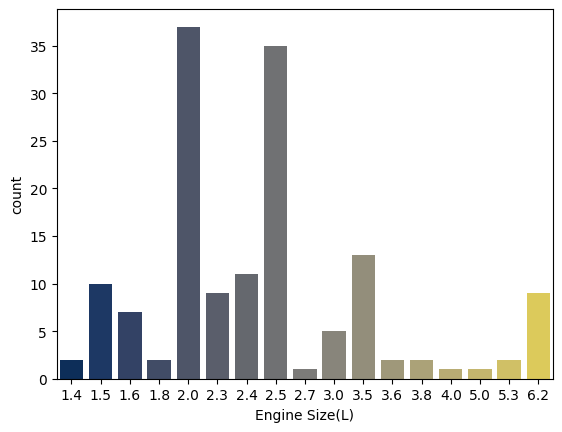

In [150]:
xx = df['Engine Size(L)'].value_counts().reset_index()
sns.barplot(x = "Engine Size(L)",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Price', ylabel='count'>

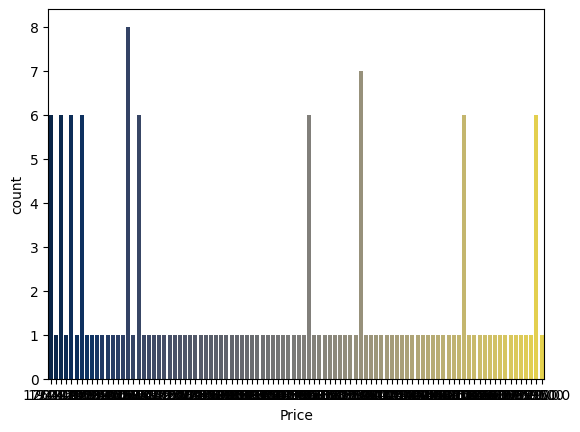

In [151]:
xx = df['Price'].value_counts().reset_index()
sns.barplot(x = "Price",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Horsepower', ylabel='count'>

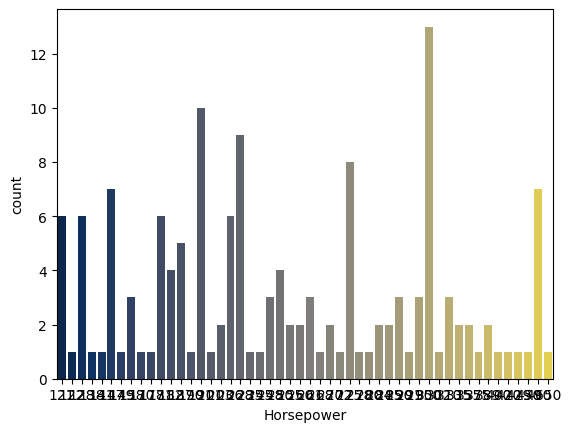

In [152]:
xx = df['Horsepower'].value_counts().reset_index()
sns.barplot(x = "Horsepower",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Customer Ratings', ylabel='count'>

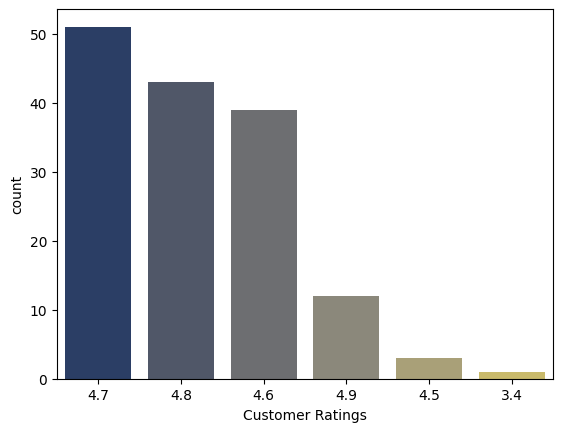

In [153]:
xx = df['Customer Ratings'].value_counts().reset_index()
sns.barplot(x = "Customer Ratings",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Sales Figures (Units Sold)', ylabel='count'>

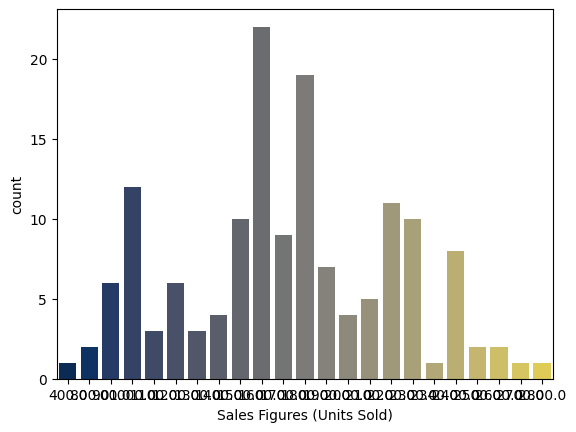

In [154]:
xx = df['Sales Figures (Units Sold)'].value_counts().reset_index()
sns.barplot(x = "Sales Figures (Units Sold)",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Torque (Nm)', ylabel='count'>

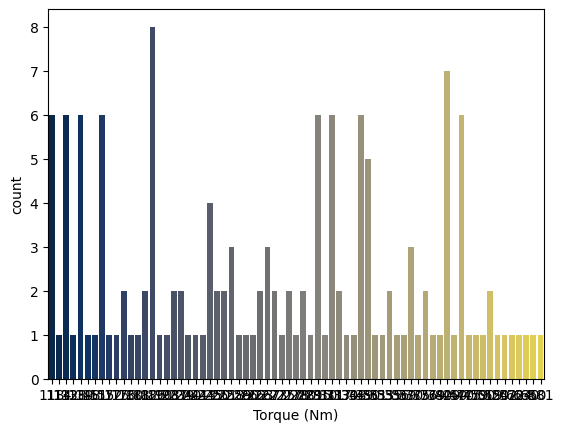

In [155]:
xx = df['Torque (Nm)'].value_counts().reset_index()
sns.barplot(x = "Torque (Nm)",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Body Type', ylabel='count'>

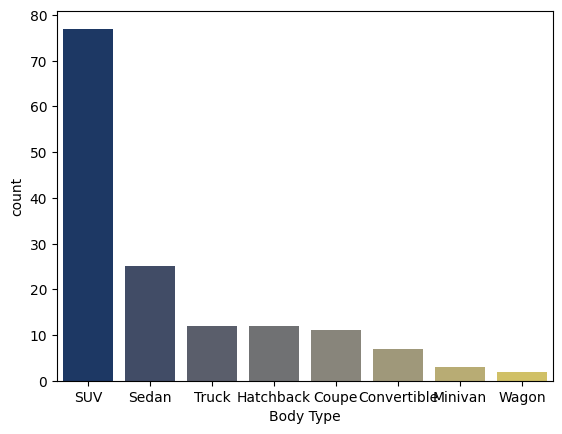

In [156]:
xx = df['Body Type'].value_counts().reset_index()
sns.barplot(x = "Body Type",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Fuel Type', ylabel='count'>

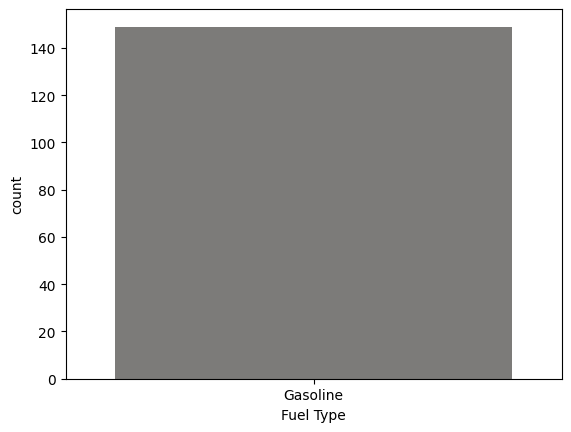

In [157]:
xx = df['Fuel Type'].value_counts().reset_index()
sns.barplot(x = "Fuel Type",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Top Speed (mph)', ylabel='count'>

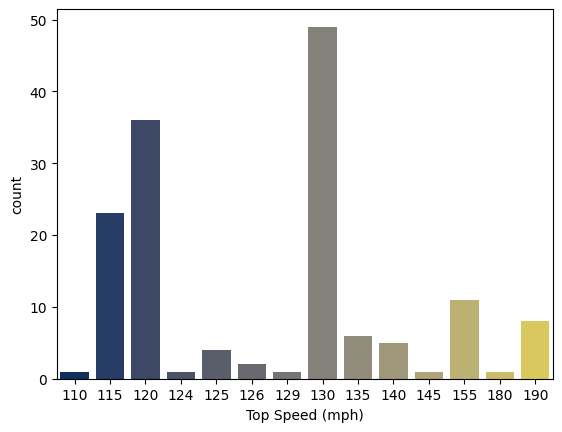

In [158]:
xx = df['Top Speed (mph)'].value_counts().reset_index()
sns.barplot(x = "Top Speed (mph)",y = "count",data=xx,palette = "cividis")

In [159]:
new_df = df[['Year','Engine Size(L)','Horsepower','Torque (Nm)','Top Speed (mph)','Mileage (MPG)','Acceleration (0-60 mph)','Sales Figures (Units Sold)','Year','Price']]


In [160]:
#2.kNN метод
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:,4].values

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [162]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [164]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         115       1.00      0.83      0.91         6
         120       0.40      1.00      0.57         4
         125       0.00      0.00      0.00         1
         126       0.00      0.00      0.00         1
         130       0.82      0.64      0.72        14
         135       0.00      0.00      0.00         1
         140       0.00      0.00      0.00         2
         155       1.00      1.00      1.00         1

    accuracy                           0.63        30
   macro avg       0.40      0.43      0.40        30
weighted avg       0.67      0.63      0.63        30



In [165]:
#2.дерево решений

In [166]:
def mse(true,pred):
    return np.mean(np.square(true-pred))

In [167]:
ML = new_df[['Horsepower','Engine Size(L)','Price']]

In [168]:
X = ML[['Horsepower','Engine Size(L)']]
Y = ML['Price']

In [169]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X, Y)

DecisionTreeRegressor(random_state=1)

In [170]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 150))
fig = plot_tree(tree, feature_names=['Horsepower','Engine Size(L)'], filled=True);

In [171]:
# Отчет:

In [172]:
#1.Данные несбалансированные. Целевой класс -Price(цена)

In [173]:
#2
#
#Accuracy, Precision и Recall - метрики представляющие собой доп информацию о поведении модели.
#
#Accuracy — это показатель, который описывает общую точность предсказания модели по всем классам.
#Данная метрика отвечает на вопрос с какой долей вероятности модель даст точный прогноз.
#В нашем случае, метрика Accuracy дает значени 0,70 или 70%(рассматриваем итоговое значение), что достаточно хорошо для датасета связанного с автомобилями.
#
#В данном примере мы не брали параметр Car Make(Производитель) и Car Model(Модель), часто благодаря производителю или марке цену накручивают.
#Также нужно понимать, что датасет несбалансированный, поэтому можно считать, что точность предсказания больше 70%.
#
#Precision отражает, насколько надежна модель при классификации Positive-меток.
#В нашей выборке значение показателя Precision равны 0.5, 0.67, 0.8, 0.86, 1 ,1.   
#Из этого можно сделать вывод, что рассматривая классификации Positive-меток мы получаем хорошие результаты.
#
#
#Recall рассчитывается как отношение числа Positive выборок, корректно классифицированных как Positive, к общему количеству Positive семплов. 
#Recall измеряет способность модели обнаруживать выборки, относящиеся к классу Positive. Чем выше recall, тем больше Positive семплов было найдено.
#В нашей выборке значение показателя Recall равны 0.8, 0.86, 1.00, 1.00 ,1.00.   
#Из этого можно сделать вывод, что рассматривая классификации Recall-меток мы получаем хорошие результаты.
#
#Решение о том, следует ли использовать precision или recall, зависит от типа вашей проблемы. 
#Если цель состоит в том, чтобы обнаружить все positive выборки (не заботясь о том, будут ли negative 
#семплы классифицированы как positive), используйте recall. Используйте precision, если ваша задача связана 
#с комплексным предсказанием класса Positive,
#то есть учитывая Negative семплы, которые были ошибочно классифицированы как Positive.
#
#F1-Score – это одна из ключевых метрик, используемых для оценки качества моделей машинного обучения. В отличие от других метрик, 
#F1-Score объединяет в себе две основные метрики: точность (precision) и полноту (recall). Он широко используется в задачах классификации, 
#где важно достичь баланса между точностью предсказаний и полнотой обнаружения данного класса.
#Значение F1-score предоставляет среднее гармоническое между точностью и полнотой.
#Чем ближе значение F1-Score к 1, тем лучше модель справляется с задачей классификации.
#Параметр F1-score можно считать более дастоверным при рассмотрении задачи классификаций.